In [1]:
import pandas as pd
import seaborn as sns 
import numpy as np 
import matplotlib.pyplot as plt 

df=pd.read_csv('wine_data.csv',usecols=[0,1,2],header=None,names=['Class Label','Alcohol','Malic Acid'])
df


,Class Label,Alcohol,Malic Acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


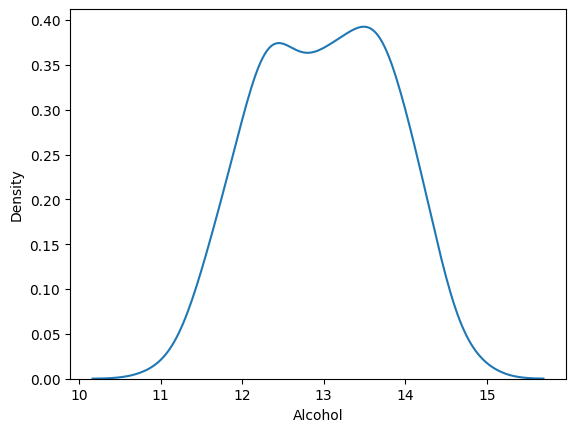

In [9]:
sns.kdeplot(df['Alcohol'])
plt.savefig('kde_alcohol.png')

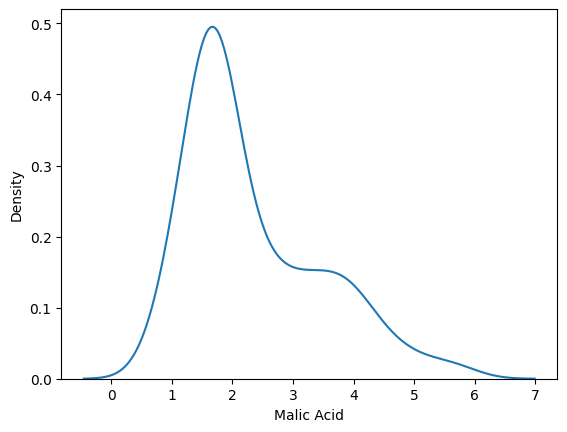

In [10]:
sns.kdeplot(df['Malic Acid'])
plt.savefig('kde_malicAcid.png')

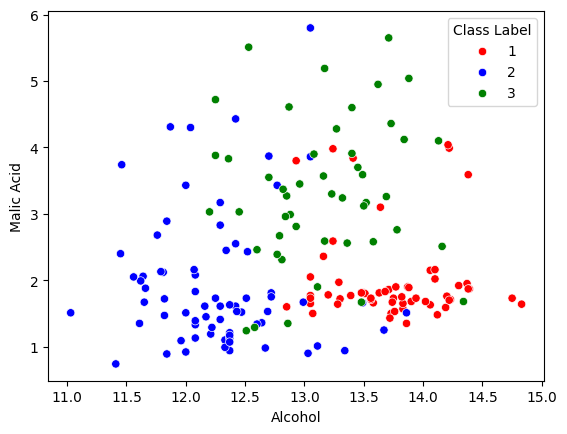

In [23]:
sns.scatterplot(x=df['Alcohol'],y=df['Malic Acid'],hue=df['Class Label'],palette=['red','blue','green'])
plt.savefig('scatter_Malic_acid_VS_Alcohol.png')

In [2]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,test=train_test_split(df.drop('Class Label',axis=1),df['Class Label'],test_size=0.1,random_state=0)
x_train.shape,x_test.shape

((160, 2), (18, 2))

In [37]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
scaler.fit(x_train)

x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

type(x_test_scaled),type(x_train_scaled)
x_train_scaled=pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled=pd.DataFrame(x_test_scaled,columns=x_test.columns)

x_test_scaled,x_train_scaled

(     Alcohol  Malic Acid
 0   0.713158    0.189409
 1   0.463158    0.393075
 2   0.352632    0.079430
 3   0.665789    0.201629
 4   0.531579    1.030550
 5   0.139474    0.266802
 6   0.797368    0.287169
 7   0.350000    0.629328
 8   0.321053    0.201629
 9   0.276316    0.221996
 10  0.613158    0.370672
 11  0.750000    0.875764
 12  0.834211    0.207739
 13  0.352632    0.067210
 14  0.671053    0.374745
 15  0.255263    0.036660
 16  0.718421    0.160896
 17  0.831579    0.173116,
       Alcohol  Malic Acid
 0    0.423684    0.126273
 1    0.736842    0.185336
 2    0.547368    0.054990
 3    0.531579    0.185336
 4    0.581579    0.376782
 ..        ...         ...
 155  0.207895    0.199593
 156  0.352632    0.087576
 157  0.365789    0.177189
 158  0.755263    0.191446
 159  0.823684    0.360489
 
 [160 rows x 2 columns])

In [36]:
print(x_train_scaled.head())
print(x_test_scaled.head())


   Alcohol  Malic Acid
0      NaN         NaN
1      NaN         NaN
2      NaN         NaN
3      NaN         NaN
4      NaN         NaN
   Alcohol  Malic Acid
0      NaN         NaN
1      NaN         NaN
2      NaN         NaN
3      NaN         NaN
4      NaN         NaN


In [38]:
np.round(x_train.describe(),3)

,Alcohol,Malic Acid
count,160.000,160.000
mean,12.993,2.339
std,0.810,1.096
min,11.030,0.740
25%,12.362,1.608
50%,13.050,1.870
75%,13.648,3.133
max,14.830,5.650


In [39]:
np.round(x_train_scaled.describe(),3)

,Alcohol,Malic Acid
count,160.000,160.000
mean,0.517,0.326
std,0.213,0.223
min,0.000,0.000
25%,0.351,0.177
50%,0.532,0.230
75%,0.689,0.487
max,1.000,1.000


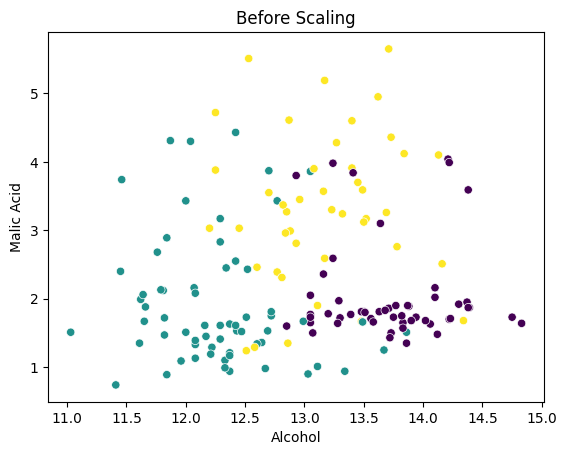

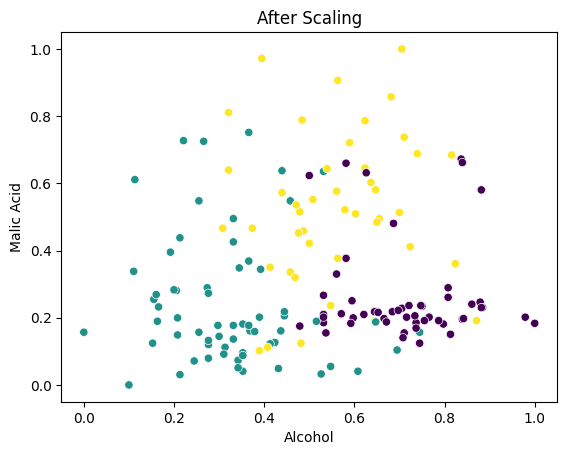

<Figure size 640x480 with 0 Axes>

In [44]:
#Plotting Scatter Plot  

sns.scatterplot(x=x_train['Alcohol'],y=x_train['Malic Acid'],c=y_train)
plt.title('Before Scaling')
plt.show()
plt.savefig('Before Scaling')
sns.scatterplot(x=x_train_scaled['Alcohol'],y=x_train_scaled['Malic Acid'],c=y_train)
plt.title('After Scaling')
plt.show()
plt.savefig('After Scaling')

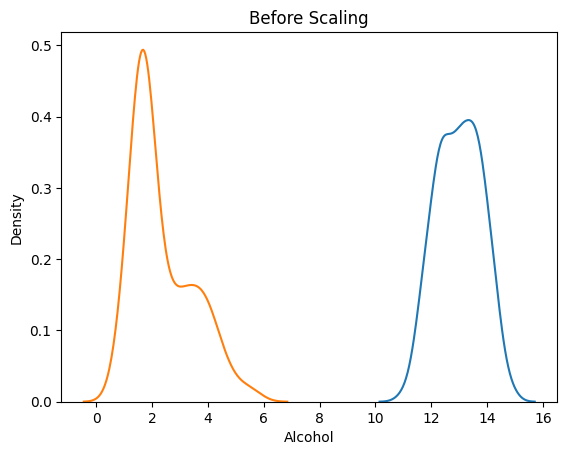

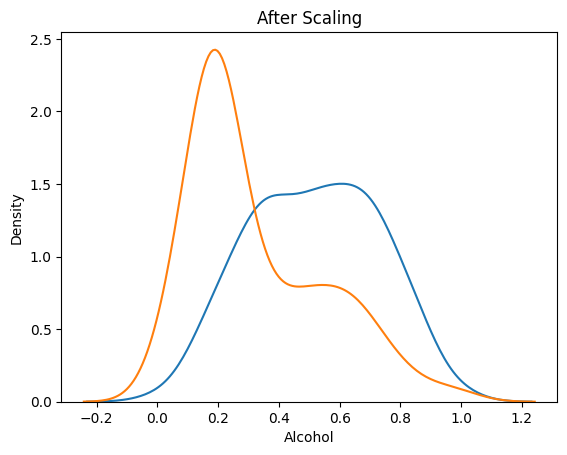

<Figure size 640x480 with 0 Axes>

In [45]:
#Before Scaling 

sns.kdeplot(x=x_train['Alcohol'])
sns.kdeplot(x=x_train['Malic Acid'])
plt.title('Before Scaling')
plt.show()
plt.savefig('Before Scaling KDEPLOT')

#After Scaling 

sns.kdeplot(x=x_train_scaled['Alcohol'])
sns.kdeplot(x=x_train_scaled['Malic Acid'])
plt.title('After Scaling')
plt.show()
plt.savefig('After Scaling KDEPLOT')

